<a href="https://colab.research.google.com/github/subbu27iitb/Time-Series/blob/main/FB_Prophet_Test0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
upload = files.upload()

Saving multiTimeline.csv to multiTimeline.csv


In [58]:
import pandas as pd
import datetime
from fbprophet import Prophet

In [47]:
df = pd.read_csv("multiTimeline.csv")
print(df.shape)
df.tail()

(261, 2)


,ds,y
256,4/10/2022,40
257,4/17/2022,40
258,4/24/2022,41
259,5/1/2022,39
260,5/8/2022,40


In [25]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      261 non-null    object
 1   y       261 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


Index(['ds', 'y'], dtype='object')

In [37]:
df['ds']=pd.to_datetime(df['ds'])
df = df.sort_values('ds', ascending = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      261 non-null    datetime64[ns]
 1   y       261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB


In [46]:
train_df = df.copy()
prophet = Prophet()
prophet.fit(train_df)
future = prophet.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
621,2023-05-04
622,2023-05-05
623,2023-05-06
624,2023-05-07
625,2023-05-08


In [54]:
forecast = prophet.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
621,2023-05-04,35.685846,33.112675,48.076658,33.831426,37.349597,4.896169,4.896169,4.896169,4.896169,4.896169,4.896169,0.0,0.0,0.0,40.582016
622,2023-05-05,35.672612,33.836801,48.353106,33.807298,37.348246,5.238874,5.238874,5.238874,5.238874,5.238874,5.238874,0.0,0.0,0.0,40.911486
623,2023-05-06,35.659379,34.188180,48.611104,33.783230,37.343644,5.528460,5.528460,5.528460,5.528460,5.528460,5.528460,0.0,0.0,0.0,41.187838
624,2023-05-07,35.646145,33.540892,48.651524,33.759162,37.342104,5.758088,5.758088,5.758088,5.758088,5.758088,5.758088,0.0,0.0,0.0,41.404232
625,2023-05-08,35.632911,33.913805,49.004732,33.735100,37.337598,5.922019,5.922019,5.922019,5.922019,5.922019,5.922019,0.0,0.0,0.0,41.554930


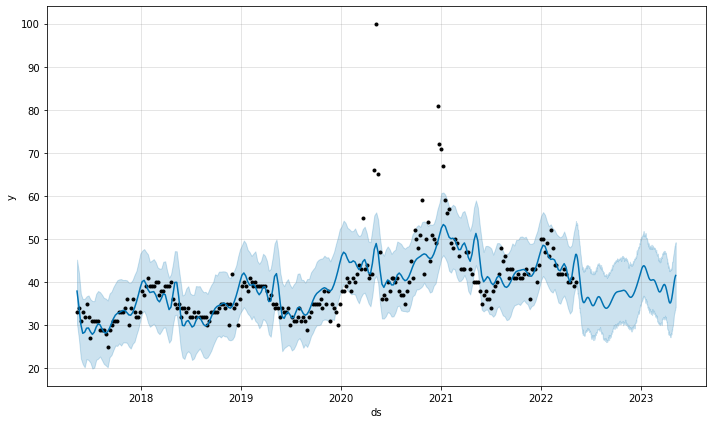

In [52]:
fig1 = prophet.plot(forecast)

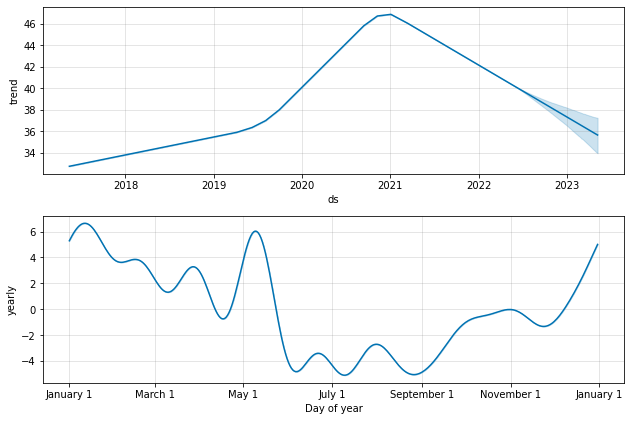

In [51]:
fig1= prophet.plot_components(forecast)

In [65]:
####################### RUFF TEST ###################################
import datetime as dt
df1=df.copy()
df1['ds']=pd.to_datetime(df1['ds'])
df1['month']=df1['ds'].dt.month
df1['day']=df1['ds'].dt.day
df1.head()

,ds,y,month,day
0,2017-05-14,33,5,14
1,2017-05-21,34,5,21
2,2017-05-28,31,5,28
3,2017-06-04,33,6,4
4,2017-06-11,32,6,11
